In [1]:
import pandas as pd 
import numpy as np
import sklearn  as sk
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
dataset = pd.read_csv("Crop_recommendation.csv")

Data Preprocessing

In [3]:
dataset.shape

(2200, 8)

In [4]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
dataset.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [6]:
dataset["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
dataset.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

<Axes: ylabel='N'>

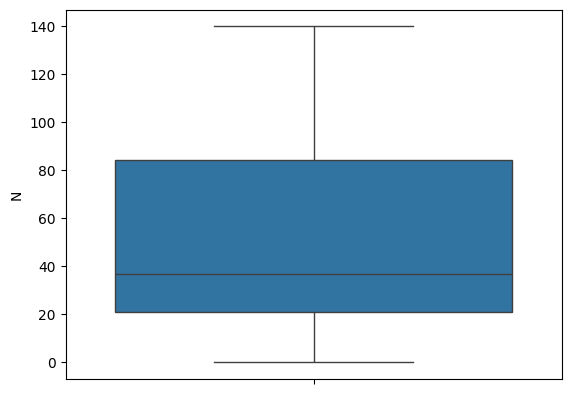

In [9]:
sns.boxplot(dataset["N"])

In [10]:
# Outlier handling
Q1 = dataset["N"].quantile(0.25)
Q3 =  dataset["N"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["N"] < lower_fence) | (dataset["N"] > upper_fence)].index)
dataset.shape

(2200, 8)

<Axes: ylabel='P'>

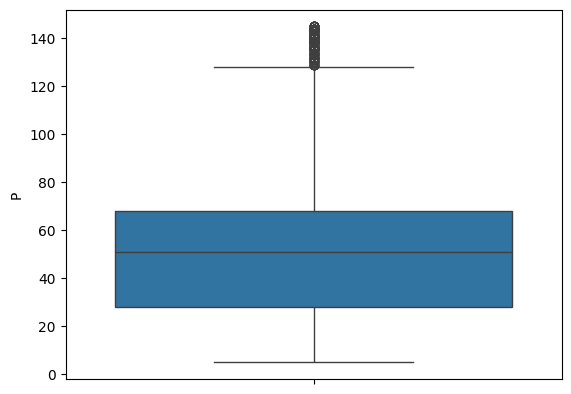

In [11]:
sns.boxplot(dataset["P"])

In [12]:
# Outlier handling
Q1 = dataset["P"].quantile(0.25)
Q3 =  dataset["P"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["P"] < lower_fence) | (dataset["P"] > upper_fence)].index)
dataset.shape

(2062, 8)

<Axes: ylabel='K'>

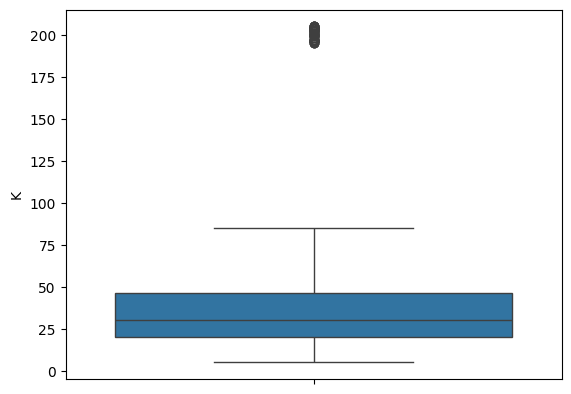

In [13]:
sns.boxplot(dataset["K"])

In [14]:
# Outlier handling
Q1 = dataset["K"].quantile(0.25)
Q3 =  dataset["K"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["K"] < lower_fence) | (dataset["K"] > upper_fence)].index)
dataset.shape

(2000, 8)

<Axes: ylabel='temperature'>

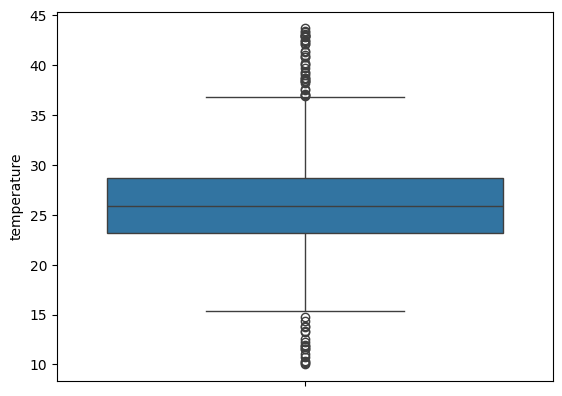

In [15]:
sns.boxplot(dataset["temperature"])


In [16]:
# Outlier handling
Q1 = dataset["temperature"].quantile(0.25)
Q3 =  dataset["temperature"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["temperature"] < lower_fence) | (dataset["temperature"] > upper_fence)].index)
dataset.shape

(1942, 8)

<Axes: ylabel='humidity'>

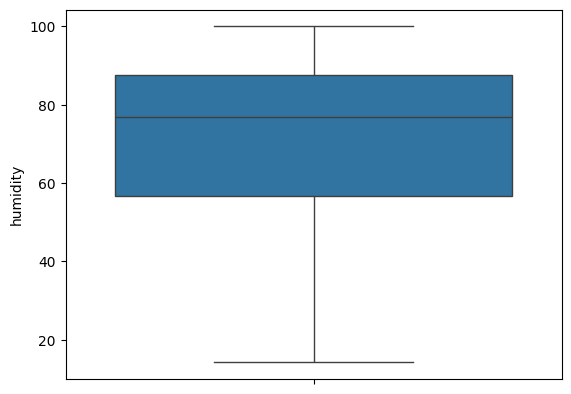

In [17]:
sns.boxplot(dataset["humidity"])


In [18]:
# Outlier handling
Q1 = dataset["humidity"].quantile(0.25)
Q3 =  dataset["humidity"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["humidity"] < lower_fence) | (dataset["humidity"] > upper_fence)].index)
dataset.shape

(1942, 8)

<Axes: ylabel='rainfall'>

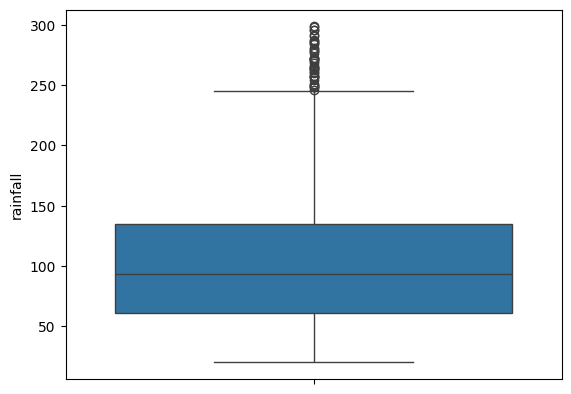

In [19]:
sns.boxplot(dataset["rainfall"])

In [20]:
# Outlier handling
Q1 = dataset["rainfall"].quantile(0.25)
Q3 =  dataset["rainfall"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["rainfall"] < lower_fence) | (dataset["rainfall"] > upper_fence)].index)
dataset.shape

(1900, 8)

In [21]:
dataset.shape

(1900, 8)

In [22]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

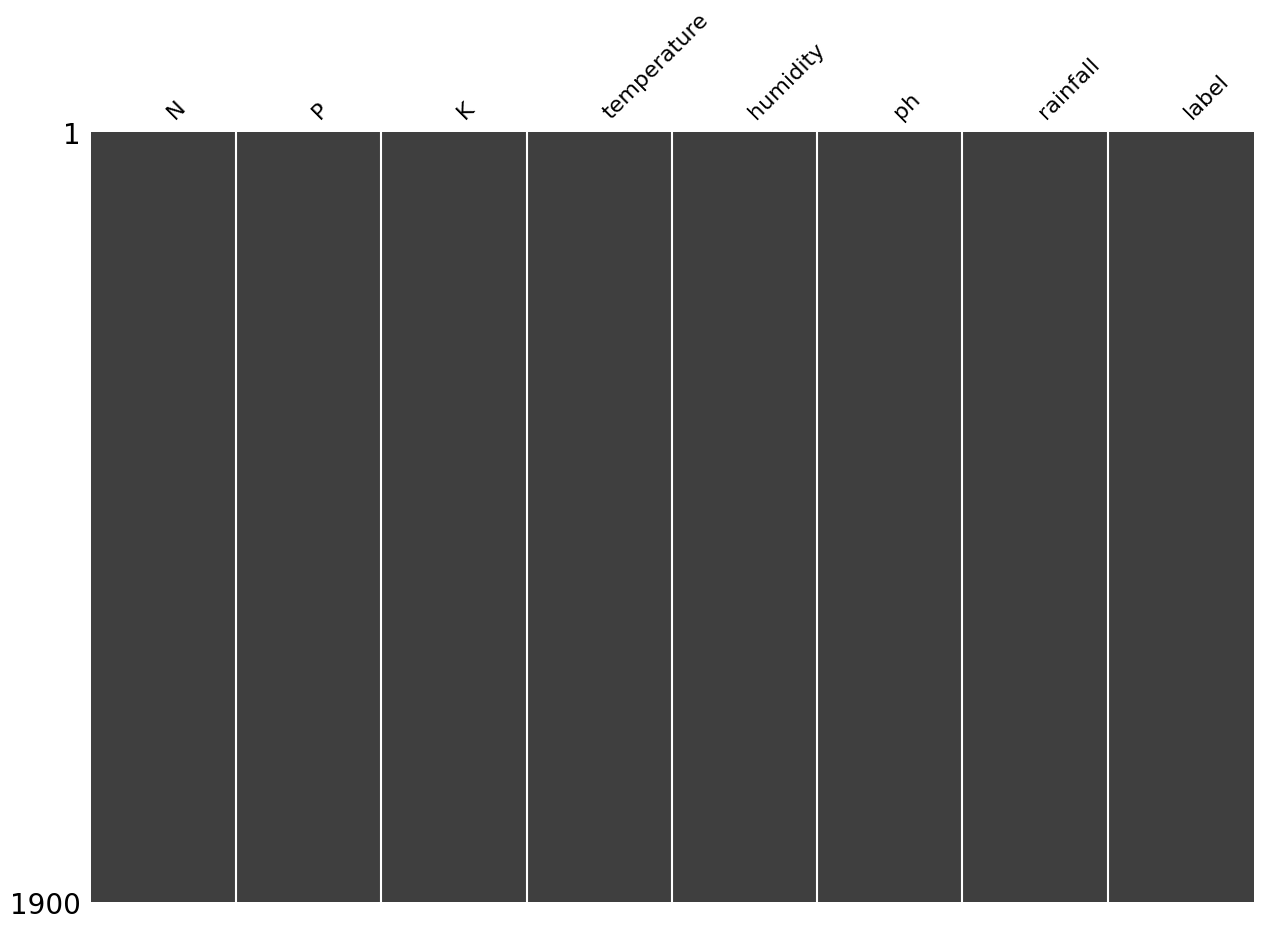

In [23]:
msno.matrix(dataset,figsize=(15,10),sparkline=False,p=0)

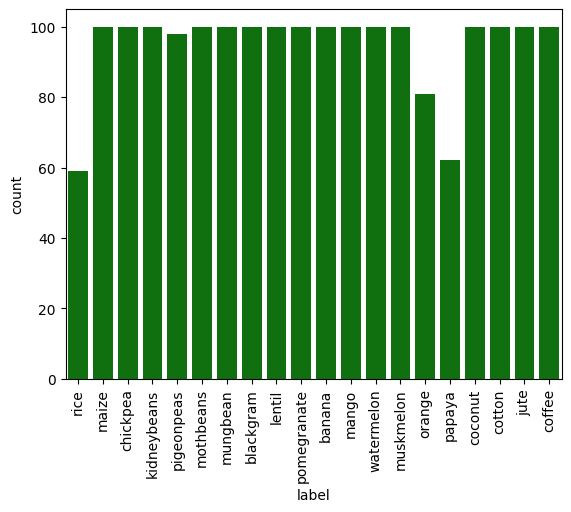

In [24]:
sns.countplot(x='label',color= "green",data=dataset)
plt.xticks(rotation=90) 
plt.show()

Modal Building

In [25]:
dataset.shape

(1900, 8)

In [26]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,0:7]
Y=dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=0,train_size=0.80)

In [27]:
X_train.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall
309    27  59  22    21.811676  23.205912  5.794159  130.060809
1036  117  79  49    25.409099  82.362081  6.176644  112.979480
53     65  60  43    21.971994  81.899182  5.658169  227.363701
836    19  72  15    28.836010  69.761129  6.890760   44.085625
1119   40  16  35    34.164389  54.164823  4.954740   98.333511
...   ...  ..  ..          ...        ...       ...         ...
878     0  74  17    23.333759  64.505158  7.240988   47.015107
1359   81   6  55    24.889105  85.870591  6.110143   51.706991
1953  107  36  21    25.292501  75.666533  6.205264   62.641742
602    36  55  20    27.014704  84.342627  6.635969   55.296354
727    48  62  15    25.365861  66.637972  7.538631   65.816559

[1520 rows x 7 columns]>

In [28]:
Y_test.head

<bound method NDFrame.head of 1334    watermelon
710      blackgram
1194         mango
126          maize
1370    watermelon
           ...    
2019          jute
884         lentil
645       mungbean
791      blackgram
1031        banana
Name: label, Length: 380, dtype: object>

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Evaluation Metrics for Training Set:
Accuracy : 1.0
Evaluation Metrics for Testing Set:
Accuracy : 0.9921052631578947
Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        14
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        18
        jute       0.86      1.00      0.93        19
 kidneybeans       1.00      1.00      1.00        17
      lentil       1.00      1.00      1.00        14
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00    

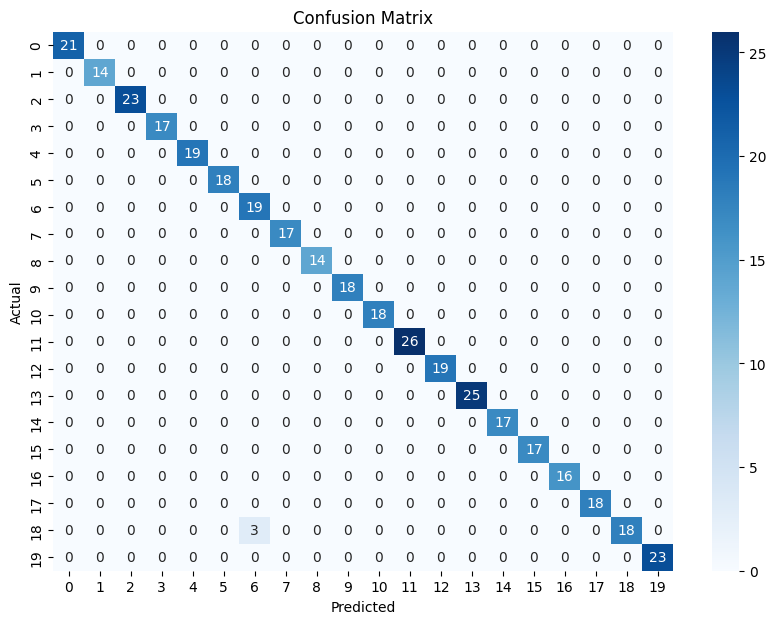

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 300)
random_forest.fit(X_train, Y_train)
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

accuracy_train = accuracy_score(Y_train, y_train_pred)
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_str_train = classification_report(Y_train, y_train_pred)
classification_report_str_test = classification_report(Y_test, y_test_pred)

print("Evaluation Metrics for Training Set:")
print("Accuracy :", accuracy_train)
print("Evaluation Metrics for Testing Set:")
print("Accuracy :", accuracy_test)
print("Classification Report:\n", classification_report_str_test)
print("Evaluation Metrics for Training Set:")
print("Classification Report:\n", classification_report_str_train)

conf_matrix = confusion_matrix(Y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualization using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import os
import pickle

# Define the directory and file path
directory = 'models'
file_path = os.path.join(directory, 'model.pkl')

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save the model
with open(file_path, 'wb') as file:
    pickle.dump(random_forest, file)

print(f"Model saved successfully at '{file_path}'")


Model saved successfully at 'models\model.pkl'
